<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_CD_2025/blob/main/IMT_Lab_TimeSeries2_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/Rogerio-mack/IMT_CD_2024/blob/main/maua_logo.png?raw=true" width=300, align="right">
<br>

## **Lab: Time Series ARIMA Models**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

path = 'https://github.com/Rogerio-mack/IMT_CD_2024/raw/refs/heads/main/data/'

# Exercício. Série Temporal, Parâmetros `p,d,q`

Analise e série sintética abaixo e determine os melhores valores `p,d,q` de um modelo ARIMA para esta série.

## **Q7. Quais os valores de p,d,q obtidos?**

## create a sintetic serie

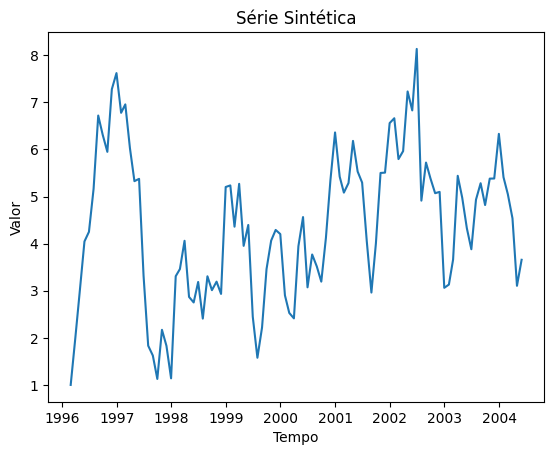

In [17]:
s = np.array([1,2,3])

np.random.seed(42)

for i in range(3,100):
  next = 0.8*s[i-1] - 0.1*s[i-3] + 0.1*np.mean(s[i-2:i]) + np.random.normal(0,1) + 1
  s = np.concatenate((s, [next]))

df = pd.DataFrame()
df.index = pd.date_range(start='25/02/1996', periods = len(s), freq='ME')
df['values'] = s
df.head()

# Plota a série temporal sintética
plt.plot(df)
plt.title('Série Sintética')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.show()



In [18]:
df.reset_index(inplace=True)
df.rename(columns={'index':'Date'}, inplace=True)
df.to_csv('ts2.csv', index=False)
df.head()


,Date,values
0,1996-02-29,1.000000
1,1996-03-31,2.000000
2,1996-04-30,3.000000
3,1996-05-31,4.046714
4,1996-06-30,4.251443


In [19]:
df = pd.read_csv('ts2.csv')
df.head()

,Date,values
0,1996-02-29,1.000000
1,1996-03-31,2.000000
2,1996-04-30,3.000000
3,1996-05-31,4.046714
4,1996-06-30,4.251443


### Pré-processamento da série

In [20]:
df.index = pd.to_datetime(df['Date'])
df.drop('Date', axis=1, inplace=True)
df.head()

,values
Date,
1996-02-29,1.000000
1996-03-31,2.000000
1996-04-30,3.000000
1996-05-31,4.046714
1996-06-30,4.251443


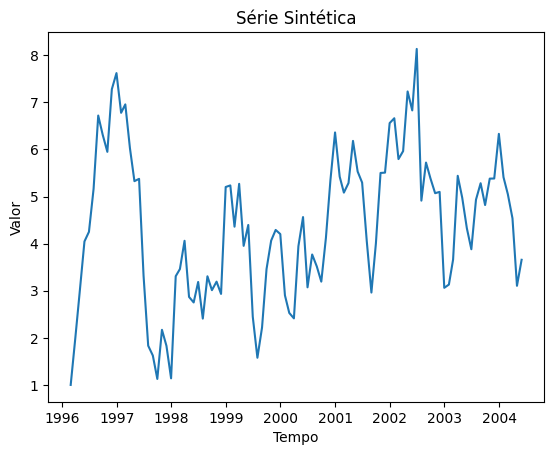

In [21]:
plt.plot(df)
plt.title('Série Sintética')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.show()


### Teste de estacionariedade, `d`

In [22]:
from statsmodels.tsa.stattools import adfuller

# Realiza o teste de Dickey-Fuller aumentado
result = adfuller(df)

# Imprime os resultados do teste
print('Estatística ADF:', result[0])
print('Valor p:', result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

# Interpreta os resultados
if result[1] <= 0.05:
    print('A série temporal é estacionária.')
else:
    print('A série temporal não é estacionária.')

Estatística ADF: -3.60212591991641
Valor p: 0.005720514550195752
Valores críticos:
	1%: -3.498198082189098
	5%: -2.891208211860468
	10%: -2.5825959973472097
A série temporal é estacionária.


### Parâmetros `p,q`

* ACF $\longrightarrow$ `q`
* PACF $\longrightarrow$ `p`

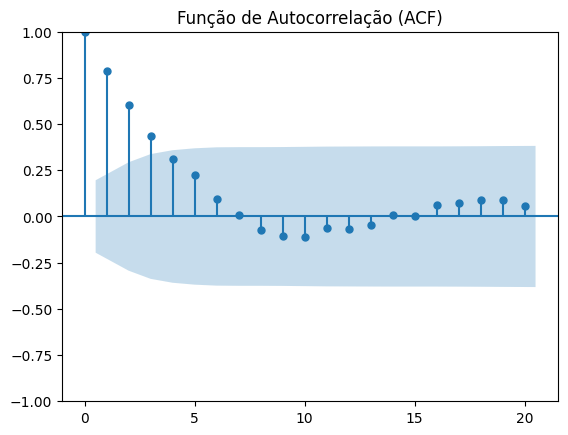

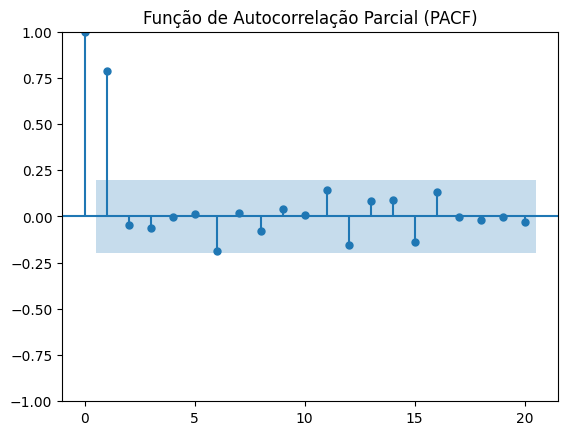

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calcula e plota a função de autocorrelação (ACF)
plot_acf(df, lags=20)
plt.title('Função de Autocorrelação (ACF)')
plt.show()

# Calcula e plota a função de autocorrelação parcial (PACF)
plot_pacf(df, lags=20)
plt.title('Função de Autocorrelação Parcial (PACF)')
plt.show()

# Exercício. Série Temporal, ARIMA(`p,d,q`)

Faça o modelo ARIMA(`p,d,q`) com base nos melhores valores encontrados.

## **Q8. Qual o AIC e MSE obtidos com o modelo ARIMA(`p,d,q`)?**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


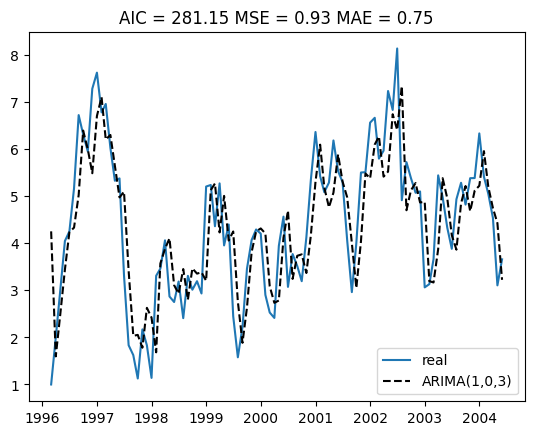

In [24]:
from statsmodels.tsa.arima.model import ARIMA

p = 1; d = 0; q = 3
model = ARIMA(df, order=(p, d, q))
results = model.fit(method_kwargs={'maxiter':700})

plt.plot(df,label='real' )

plt.plot(results.fittedvalues, 'k--', label='ARIMA(' + str(p) + ',' + str(d) + ',' + str(q) + ')')
plt.title(f'AIC = {results.aic:.2f} MSE = {results.mse:.2f} MAE = {results.mae:.2f}')

plt.legend()
plt.show()

In [25]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                 values   No. Observations:                  100
Model:                 ARIMA(1, 0, 3)   Log Likelihood                -134.573
Date:                Wed, 04 Jun 2025   AIC                            281.146
Time:                        20:37:15   BIC                            296.777
Sample:                    02-29-1996   HQIC                           287.472
                         - 05-31-2004                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2516      0.409     10.395      0.000       3.450       5.053
ar.L1          0.7435      0.144      5.166      0.000       0.461       1.026
ma.L1          0.1135      0.199      0.572      0.5

## **Q9. Qual a predição para o mês de Setembro de 2004?**

In [26]:
results.forecast(4)

,predicted_mean
2004-06-30,3.683684
2004-07-31,3.897585
2004-08-31,3.985141
2004-09-30,4.053502


## **Q9b. Qual o erro MAPE obtido para previsão dos 3 últimos meses presentes na série com base nos valores anteriores?** (RESOLVIDO)

Neste exercício você verifica a capacidade de generalização do modelo para novos casos, o que não é possível para previsão de dados "futuros" que não são conhecidos.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


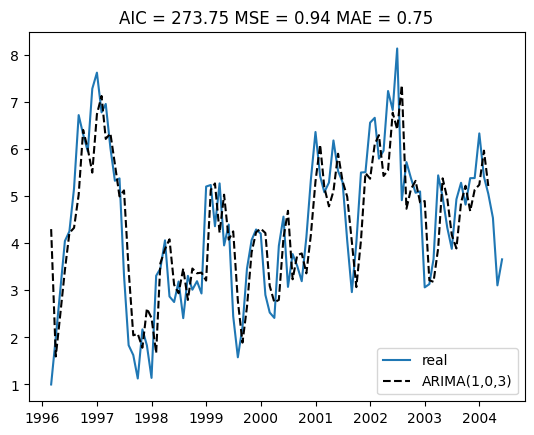

In [27]:
from statsmodels.tsa.arima.model import ARIMA

p = 1; d = 0; q = 3
model = ARIMA(df[0:-3], order=(p, d, q))
results = model.fit(method_kwargs={'maxiter':700})

plt.plot(df,label='real' )

plt.plot(results.fittedvalues, 'k--', label='ARIMA(' + str(p) + ',' + str(d) + ',' + str(q) + ')')
plt.title(f'AIC = {results.aic:.2f} MSE = {results.mse:.2f} MAE = {results.mae:.2f}')

plt.legend()
plt.show()

In [28]:
results.forecast(3)

,predicted_mean
2004-03-31,4.762935
2004-04-30,4.646314
2004-05-31,4.567551


In [29]:
df.tail(3)

,values
Date,
2004-03-31,4.537624
2004-04-30,3.104870
2004-05-31,3.657160


In [30]:
# Calculate MAPE
def MAPE(y_true, y_pred):
  return np.mean(np.abs((y_true - y_pred) / y_true))

y_true = df.tail(3)['values'].values
y_pred = results.forecast(3)

print(f"MAPE: {MAPE(y_true, y_pred):.2f}")

MAPE: 0.27
